#     COURSE: Linear algebra: theory and implementation
##    SECTION: Matrix multiplications

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [31]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)  # 4 x 3
B = np.random.randn(n,k)  # 3 x 6
C = np.random.randn(m,k)  # 4 x 6

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
# np.matmul(A,A)
np.matmul(A.T,C)
np.matmul(B,B.T)
np.matmul(np.matrix.transpose(B),B)
# np.matmul(B,C)
# np.matmul(C,B)
# np.matmul(C.T,B)
np.matmul(C,B.T)

array([[ 1.63896555, -6.25014303,  1.61082229],
       [ 3.73000297,  3.44302855, -3.35788213],
       [ 2.64567672, -2.83062206,  1.15747628],
       [-1.62349929,  1.73918676,  2.89553179]])

In [32]:
# Code challenge: matrix mul by larying
m, n = 4, 6
A = np.random.randn(m, n)
B = np.random.randn(n, m)

# build the product matrix layer-wise
C1 = np.zeros((m, m))
for i in range(n):
    C1 += np.outer(A[:, i], B[i, :])

# Implement matrix mul
C2 = A@B

C1 -C2

array([[ 0.00000000e+00,  5.55111512e-17,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  4.16333634e-17, -2.22044605e-16,
         0.00000000e+00],
       [ 0.00000000e+00,  2.77555756e-17, -4.44089210e-16,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.22044605e-16,
        -4.44089210e-16]])

### Matrix Multiplication with a diagonal matrix

- AD -> Columns
- DA -> Rows


---
# VIDEO: Order-of-operations on matrices
---

- Know the strange rule about reversing matrix order when applying an operation to multiplied matrices.
- LIVE EVIL! => (LIVE)<sup>T</sup> = E<sup>T</sup>V<sup>T</sup>I<sup>T</sup>L<sup>T</sup>
- However, each individual tranposed matrix can be invalid for the matrix mulplication.


In [33]:

n = 7
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
np.round(res1-res2)

array([[-0.,  0., -0., -0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -0.],
       [ 0., -0., -0., -0., -0.,  0.,  0.],
       [-0.,  0., -0., -0.,  0., -0., -0.]])


---
# VIDEO: Matrix-vector multiplication
---


- A w = v : m x n @ n x 1 = m x 1
  - weighted combinations of the columns of A
- w<sup>T</sup> A = v : 1 x m @ m x n = 1 x n
  - weighted combinations of the rows of A


In [34]:

# number of elements
m = 4

# create matrices
N = np.random.randint(-10,11,(m,m))
S = np.round( N.T*N / m**2 ) # scaled symmetric: S.T = S

# and vector
w = np.array([-1, 0, 1, 2])

print(N)
print(S)
print(w)
print()

# with symmetric matrix: v = v.T
print( S@w )     # 1 = v
print( S.T@w )   # 2 = v.T
print( w@S )     # 3 = v.T, same as #5
print( w.T@S.T ) # 4 = v
print( w.T@S )   # 5 = v.T
print()

# with nonsymmetric matrix: v != v.T
print( N@w )     # 1 = v
print( N.T@w )   # 2 = v.T
print( w@N )     # 3 = v.T
print( w.T@N.T ) # 4 = v
print( w.T@N )   # 5 = v.T


[[ 9 10  8 -5]
 [ 5 -5 -6  3]
 [-3  1 10  7]
 [-1 -2  4  3]]
[[ 5.  3. -2.  0.]
 [ 3.  2. -0. -0.]
 [-2. -0.  6.  2.]
 [ 0. -0.  2.  1.]]
[-1  0  1  2]

[-7. -3. 12.  4.]
[-7. -3. 12.  4.]
[-7. -3. 12.  4.]
[-7. -3. 12.  4.]
[-7. -3. 12.  4.]

[-11  -5  27  11]
[-14 -13  10  18]
[-14 -13  10  18]
[-11  -5  27  11]
[-14 -13  10  18]



---
# VIDEO: 2D transformation matrices
---


- Av = lv, l is the eigen value, v is the eigen vector.
- A -> l: A matrix is converted to a single value.

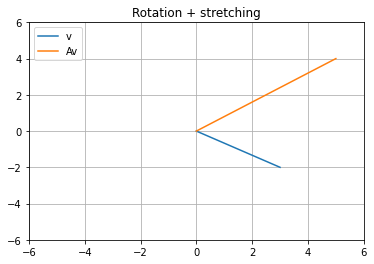

In [35]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

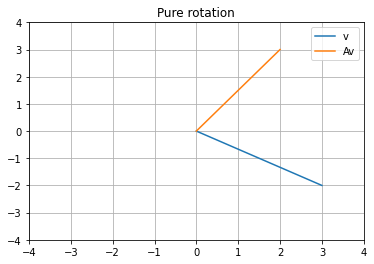

In [36]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
# th = 5*np.pi/24
th = np.pi/2
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

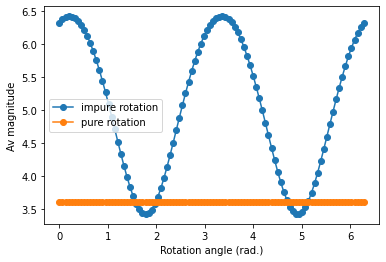

In [37]:
# Code challenge: Pure and Impure rotation matrices

thetas = np.linspace(0, 2 * np.pi, 100)

vecmags = np.zeros((len(thetas), 2))

for i, th in enumerate(thetas):
    A1 = np.array([ [2*math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)] ])  # impure
    A2 = np.array([ [math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)] ])  # pure

    # compute vector magnitudes
    vecmags[i, 0] = np.linalg.norm(A1@v.T)
    vecmags[i, 1] = np.linalg.norm(A2@v.T)

plt.plot(thetas, vecmags, 'o-')
plt.xlabel('Rotation angle (rad.)')
plt.ylabel('Av magnitude')
plt.legend(['impure rotation', 'pure rotation'])
plt.show()


In [38]:
# Code challenge: Geometric transformations via matmul

def transform(T):
    # generate XY coordinates for a circle
    x = np.linspace(-np.pi, np.pi, 100)
    xy = np.vstack((np.cos(x), np.sin(x))).T
    print(np.shape(xy))

    # plot the circle
    plt.plot(xy[:, 0], xy[:, 1], 'o')
    
    # multiply matrix by coordinates
    newxy = xy@T

    # plot the new coords.
    plt.plot(newxy[:, 0], newxy[:, 1], 'o')

    plt.axis('square')
    plt.show()
# try with various matrices... starting with I
# try with a singular matrix (columns from a linearly depedent set)


(100, 2)


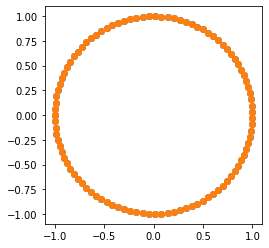

In [39]:
# Identity matrix
I = np.array([ [1, 0], 
               [0, 1] ])
transform(I)

(100, 2)


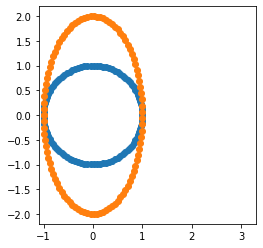

(100, 2)


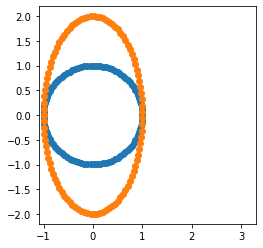

In [40]:
T = np.array([ [1, 0], 
               [0, 2] ])
transform(T)
T = np.array([ [1, 0], 
               [0, -2] ])
transform(T)

(100, 2)


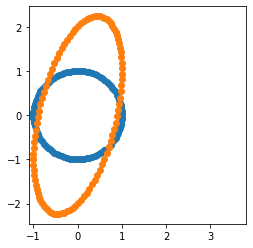

In [41]:
T = np.array([ [1, 1], 
               [0, 2] ])
transform(T)

(100, 2)


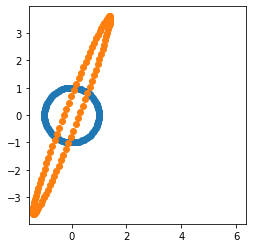

In [42]:
T = np.array([ [1, 3], 
               [1, 2] ])
transform(T)

(100, 2)


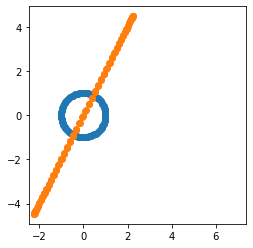

(100, 2)


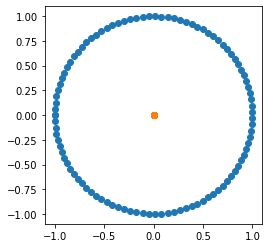

In [43]:
Singular= np.array([ [1,2],   
               [2, 4] ])
transform(Singular)  # dimension 2D -> 1D

T = np.array([ [0,0],   
               [0, 0] ])
transform(T)  # dimension 2D -> 1D


---
# VIDEO: Additive and multiplicative matrix identities
---


In [44]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
print(np.array_equal( A@I , A   ))
print(np.array_equal( A   , A@I ))
print(np.array_equal( A   , A+I ))

print(np.array_equal( A   , A+Z ))
print(np.array_equal( A+Z , A@I ))


True
True
False
True
True



---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [45]:
## the additive method

# specify sizes (squre only)
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + A.T )/2  # make it symmetric
# print(S)
# print()
# print(S.T)
# print()

# A symmetric matrix minus its transpose should be all zeros
print( S-S.T )


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [46]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = A.T@A  # 3 x 5, 5 x 3 -> 3 x 3
AAt = A@A.T  # 5 x 3, 3 x 5 -> 5 x 5

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - AtA.T )
print( AAt - AAt.T )

(3, 3)
(5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [47]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C1 = np.multiply( A,B )
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1-C2)


[[-0.22174979  0.00318049]
 [-0.08497817 -0.41554535]
 [ 0.05554359 -1.27491891]
 [ 0.20508099 -0.08101168]
 [ 0.26728843  0.40228352]
 [ 0.0389906   0.21090838]
 [-0.2279389   2.14536712]
 [ 0.80387027 -1.50032129]
 [-0.04560777  0.15293976]
 [-0.0220454   0.74595416]
 [-0.23468551 -0.6136019 ]
 [ 0.05420605 -0.48885064]
 [-0.05399426 -0.28073943]]
 
[[-0.22174979  0.00318049]
 [-0.08497817 -0.41554535]
 [ 0.05554359 -1.27491891]
 [ 0.20508099 -0.08101168]
 [ 0.26728843  0.40228352]
 [ 0.0389906   0.21090838]
 [-0.2279389   2.14536712]
 [ 0.80387027 -1.50032129]
 [-0.04560777  0.15293976]
 [-0.0220454   0.74595416]
 [-0.23468551 -0.6136019 ]
 [ 0.05420605 -0.48885064]
 [-0.05399426 -0.28073943]]
 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [48]:
# Code challenge: symmetry of combined symmetric matrices

# create two symmetric matrices
m = 3
A = np.random.randn(m , m)
AtA = A.T@A  

B = np.random.randn(m , m)
BtB = B.T@B 

# compute sum, multiplication and Hadamard multiplication
Cs = AtA + BtB
Cm = AtA @ BtB
Ch = AtA * BtB

# determine whether result is symmetric
print(Cs - Cs.T), print(' ')
print(Cm - Cm.T), print(' ')  # not symmetric!
print(Ch - Ch.T)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
 
[[ 0.          4.8371493   0.54527653]
 [-4.8371493   0.         -2.4154792 ]
 [-0.54527653  2.4154792   0.        ]]
 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]



---
# VIDEO: Multiplication of two symmetric matrices
---


In [49]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )

print(A@B - (A@B).T)

Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l
Matrix([[0, c*q + d*r - e*n - f*o, b*q + d*t - e*m - h*o, b*r + c*t - f*m - h*n], [-c*q - d*r + e*n + f*o, 0, b*n - c*m + f*t - h*r, b*o - d*m + e*t - h*q], [-b*q - d*t + e*m + h*o, -b*n + c*m - f*t + h*r, 0, c*o - d*n + e*r - f*q], [-b*r - c*t + f*m + h*n, -b*o + d*m - e*t + h*q, -c*o + d*n - e*r + f*q, 0]])


In [50]:
# nice printing in sympy
init_printing()

# but AB neq (AB)'
A@B - (A@B).T

⎡          0             c⋅q + d⋅r - e⋅n - f⋅o   b⋅q + d⋅t - e⋅m - h⋅o   b⋅r +
⎢                                                                             
⎢-c⋅q - d⋅r + e⋅n + f⋅o            0             b⋅n - c⋅m + f⋅t - h⋅r   b⋅o -
⎢                                                                             
⎢-b⋅q - d⋅t + e⋅m + h⋅o  -b⋅n + c⋅m - f⋅t + h⋅r            0             c⋅o -
⎢                                                                             
⎣-b⋅r - c⋅t + f⋅m + h⋅n  -b⋅o + d⋅m - e⋅t + h⋅q  -c⋅o + d⋅n - e⋅r + f⋅q       

 c⋅t - f⋅m - h⋅n⎤
                ⎥
 d⋅m + e⋅t - h⋅q⎥
                ⎥
 d⋅n + e⋅r - f⋅q⎥
                ⎥
     0          ⎦

In [51]:
# maybe for a submatrix?
n = 2  # only work if n == 2
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1@B1).T

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [52]:
# maybe for a submatrix?
n = 3  # only work if n == 2
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1@B1).T

⎡    0       c⋅q - e⋅n   b⋅q - e⋅m⎤
⎢                                 ⎥
⎢-c⋅q + e⋅n      0       b⋅n - c⋅m⎥
⎢                                 ⎥
⎣-b⋅q + e⋅m  -b⋅n + c⋅m      0    ⎦

In [53]:
# Code challenge: standard and Hadamard multiplication for diagonal matrices

# create two sqaure matrices: "full" and diagonal
A = np.random.randn(4, 4)
D = np.diag(np.random.randn(4))

# multiply each matrix by itself: Standard and Hadamard
print(A@A), print(' ')
print(A*A), print(' ')

# the both results are same
print(D), print(' ')
print(D@D), print(' ')
print(D*D)

[[ 0.34876144 -0.96753472  0.69402692 -0.82794935]
 [-0.09335543  3.13325066  0.29091349  4.04091492]
 [ 0.85289467  2.977738    1.81413112  4.39719873]
 [ 0.96607311  3.39529112  2.26480265  5.02155738]]
 
[[3.42806215e-04 7.78545799e-01 2.23225516e-01 9.17024207e-03]
 [3.28508623e-04 2.52850790e+00 1.51341076e-01 1.83026461e+00]
 [5.43062786e-01 1.23038602e+00 8.36791639e-01 1.26877434e+00]
 [2.70450141e-02 5.68741678e-01 8.86720972e-01 2.95635403e+00]]
 
[[-0.32303056  0.          0.          0.        ]
 [ 0.          0.66351178  0.          0.        ]
 [ 0.          0.          1.29105304  0.        ]
 [ 0.          0.          0.         -1.19848458]]
 
[[0.10434874 0.         0.         0.        ]
 [0.         0.44024789 0.         0.        ]
 [0.         0.         1.66681794 0.        ]
 [0.         0.         0.         1.43636528]]
 
[[0.10434874 0.         0.         0.        ]
 [0.         0.44024789 0.         0.        ]
 [0.         0.         1.66681794 0.        ]


---
# VIDEO: Frobenius dot-product
---


In [54]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method: sum of diagonal of the matrix
frob_dp2 = np.trace( A.T@B )
print(frob_dp2)
print(frob_dp), print(' ')

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( A.T@A ) )
print(Anorm)
print(Anorm2)

5.16204679735311
5.162046797353109
 
6.472428094471421
6.472428094471421


# VIDEO: Matrix norms

In [55]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 2
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normSchat,normInd2, lamb)

16.431676725154983 16.431676725154986 16.392007827749776 16.392007827749776


In [56]:
# Code challenge: conditions for self-adjoint
# <Av, w> = <v, Aw>, v != w

# 1. List 2-3 conditions for this equality to hold
# 2. Prove the equality when those conditions are met.
# 3. Illustrate in code.

# (Av).T w = v.T A.T w = v.T Aw

import numpy as np

m = 5

A = np.random.randn(m, m)
A = A@A.T  # comment this genreate the big diff at the end

v = np.random.randn(m)
w = np.random.rand(m)  # w differs significantly from v 

np.dot(A@v, w) - np.dot(v, A@w)  # 0 or almost 0

In [57]:
# Code challenge: The matrix asymmetry index
# develop a formula that will proportionally mix a symmetric and skew-symmetric matrix.
# Test on a symmetric matrix, skew-symmetric matrix, and random matrix.
# Use the additive method to create random symmetric matrices.

import numpy as np
import matplotlib.pyplot as plot

# 1. implement Matrix Asymmetry Index (MAI)

def MAI(A):
    Aanti = (A-A.T) / 2  # Asymmetric part of A
    mai = np.linalg.norm(Aanti) / np.linalg.norm(A)
    return mai

# 2. compuate MAI for symmetric, skew-symmetric, and random matrix

print('MAI for Symmetric Matrix:')
A = np.random.randn(5, 5)
A = (A+A.T)/2  # make A symmetric
print(A)
print(MAI(A)), print(' ')

print('MAI for skew-symmetric Matrix')
A = np.random.randn(5, 5)
A = (A-A.T)/2  # make A skew-symmetric
print(A)
print(MAI(A)), print(' ')

print('MAI for random Matrix')
A = np.random.randn(5, 5)
print(A)
print(MAI(A)), print(' ')

MAI for Symmetric Matrix:
[[-0.00261257  0.13376043  0.66711222  0.52447811  0.47966618]
 [ 0.13376043 -0.37546141 -0.53648955  0.13306144 -0.05603331]
 [ 0.66711222 -0.53648955  1.55183738 -0.1670279  -1.24855936]
 [ 0.52447811  0.13306144 -0.1670279  -1.38160301  0.10950148]
 [ 0.47966618 -0.05603331 -1.24855936  0.10950148 -1.31130914]]
0.0
 
MAI for skew-symmetric Matrix
[[ 0.          0.28781346  0.98257404  0.39661751 -0.22488963]
 [-0.28781346  0.          1.23972988 -0.32004408 -0.17364196]
 [-0.98257404 -1.23972988  0.         -0.05886402  0.39955078]
 [-0.39661751  0.32004408  0.05886402  0.          1.01246368]
 [ 0.22488963  0.17364196 -0.39955078 -1.01246368  0.        ]]
1.0
 
MAI for random Matrix
[[-1.46852903e+00  7.69217200e-02 -1.86830240e+00 -4.67899296e-01
  -1.37292229e-01]
 [-1.36473321e+00 -1.54305362e+00  1.87071634e-03 -5.14172514e-01
  -6.73639711e-02]
 [ 3.55987360e-01  8.04923239e-01 -8.67044135e-01 -3.82893197e-01
  -3.72646941e-01]
 [ 5.62330947e-01  2.08

(None, None)

In [58]:
# 3. Formula for mixing skew/symmetric matrices

def mixed_skew_symmetric_mat(p = 1.0):
    A = np.random.randn(5, 5)
    B = (1-p) * (A+A.T)/2 + p * (A-A.T)/2
    return B


In [59]:
for p in [0.0, 0.25, 0.5, 0.75, 1.0]:
    B = mixed_skew_symmetric_mat(p)
    print(B)
    print(MAI(B))

[[ 0.29475968 -0.82776995  1.18711008 -0.32679762 -0.19615115]
 [-0.82776995 -1.5904504  -0.56981779  1.39234579 -0.70354268]
 [ 1.18711008 -0.56981779  0.30704652  0.43006161 -0.34407272]
 [-0.32679762  1.39234579  0.43006161 -1.31324171  0.64037406]
 [-0.19615115 -0.70354268 -0.34407272  0.64037406  0.83747553]]
0.0
[[ 1.14913713  0.10651851  0.07917592  0.32255162 -1.13573904]
 [ 0.46316937 -0.30146904 -0.5816271   0.45367158 -0.42861152]
 [ 0.15601712 -0.8046741   0.96457043 -0.46542389 -0.19833354]
 [-0.46049586  0.87862491 -0.75625463 -0.40585109 -0.06545626]
 [-1.37710581 -0.14869338 -0.23684447 -0.43565104 -0.06940068]]
0.26495698262796574
[[ 0.62923021 -0.50020188  0.46886971  0.12449844 -0.87968215]
 [-0.00138668 -0.18197359  0.52292427  0.24547364  0.19526671]
 [ 1.10442721 -0.2348224   0.58617624  0.24913443 -0.39993426]
 [-0.03571837  0.11038214 -0.05563191 -0.88787098 -0.40129761]
 [ 0.44423262  0.19235457  0.36027578 -0.42651198 -0.34488348]]
0.5779175955970356
[[-0.2803

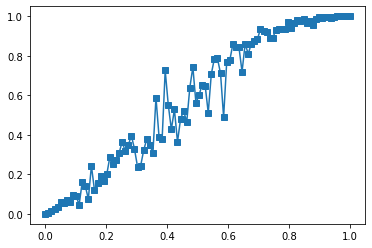

In [62]:
import numpy as np
import matplotlib.pyplot as plot

# 4. Test on random matrices

ps = np.linspace(0, 1, 100)
mai = np.zeros(len(ps))
for i, p in enumerate(ps):
    B = mixed_skew_symmetric_mat(p)

    # compute and store the MAI
    mai[i] = MAI(B)

plt.plot(ps, mai, 's-')
plt.show()